# 15. This problem involves the Boston data set, which we saw in the lab for this chapter. 

We will now try to predict per capita crime rate using the other variables in this data set. In other words, per capita crime rate is the response, and the other variables are the predictors.

In [521]:
import pandas as pd
import numpy as np

from ISLP import load_data

import statsmodels.api as sm
from ISLP.models import summarize

import matplotlib.pyplot as plt
import seaborn as sns

**Boston Housing Dataset Rows**

Each row represents the area/town in the Boston Housing City

**Boston Housing Dataset Columns**
1. crim: per capita crime rate by town. A higher value indicates a higher crime rate in the area.
2. zn: proportion of residential land zoned for lots over 25,000 sq.ft. More number shows that more land is designated for the residential area. 
3. indus: proportion of non-retail business acres per town. A higher value indicates a larger area of the town is dedicated to industrial.
4. chas: Charles River dummy variable (1 if tract bounds river, else 0).
5. nox: nitrogen oxides concentration (parts per 10 million). Pollution which can effects health
6. rm: average number of rooms per dwelling. A higher value indicates the large size of the home.
7. age: proportion of owner-occupied units built prior to 1940. Historical building older houses, or buildings. 
8. dis: weighted mean of distances to five Boston employment centres. Less distance shows more job opportunities.
9. rad: index of accessibility to radial highways. Higher number indicates area is more connected to the highways.
10. tax: full-value property-tax rate per 10,000 dollor. More tax means more costly.
11. ptratio: pupil-teacher ratio by town. How many teacher in the area are. 
12. lstat: lower status of the population (percent).
13. medv: median value of owner-occupied homes in 1000s dollor.

In [522]:
boston = load_data("Boston") 
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


## (a) For each predictor, fit a simple linear regression model to predict the response. 

Describe your results. In which of the models is there a statistically significant association between the predictor and the response? Create some plots to back up your assertions.

In [523]:
boston['intercept'] = np.ones(boston.shape[0])

In [524]:
model_a = []
for col in boston.columns:
    if col not in ['crim','intercept']:
        model_a.append(sm.OLS(boston['crim'], boston[['intercept',col]]).fit())
        
        
for i in model_a:
    print(summarize(i))
    print('\n')

             coef  std err       t  P>|t|
intercept  4.4537    0.417  10.675    0.0
zn        -0.0739    0.016  -4.594    0.0


             coef  std err      t  P>|t|
intercept -2.0637    0.667 -3.093  0.002
indus      0.5098    0.051  9.991  0.000


             coef  std err      t  P>|t|
intercept  3.7444    0.396  9.453  0.000
chas      -1.8928    1.506 -1.257  0.209


              coef  std err       t  P>|t|
intercept -13.7199    1.699  -8.073    0.0
nox        31.2485    2.999  10.419    0.0


              coef  std err      t  P>|t|
intercept  20.4818    3.364  6.088    0.0
rm         -2.6841    0.532 -5.045    0.0


             coef  std err      t  P>|t|
intercept -3.7779    0.944 -4.002    0.0
age        0.1078    0.013  8.463    0.0


             coef  std err       t  P>|t|
intercept  9.4993    0.730  13.006    0.0
dis       -1.5509    0.168  -9.213    0.0


             coef  std err       t  P>|t|
intercept -2.2872    0.443  -5.157    0.0
rad        0.6179    0.034

**All the predictors has statistically significant association with response, except the predictor **chas**, by looking it the t and p values.**

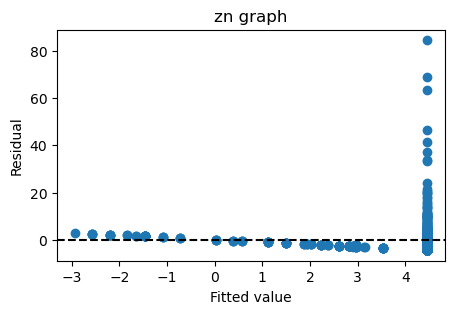

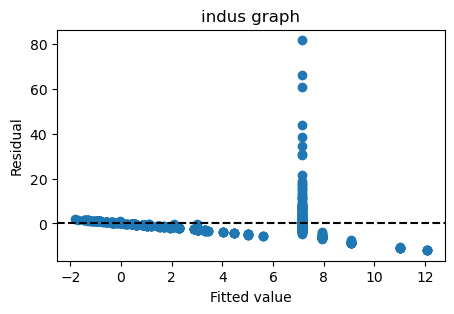

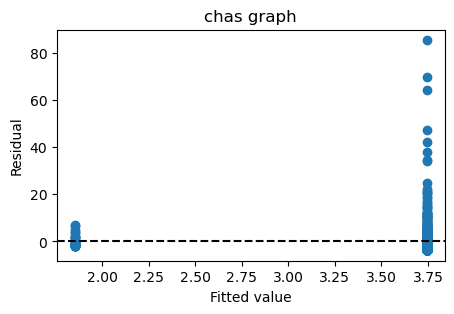

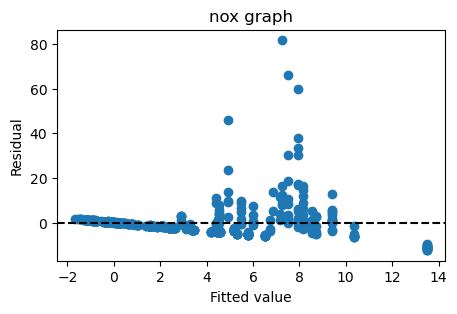

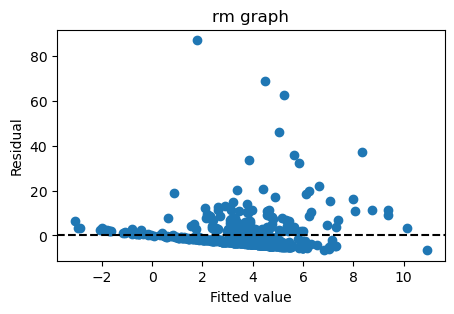

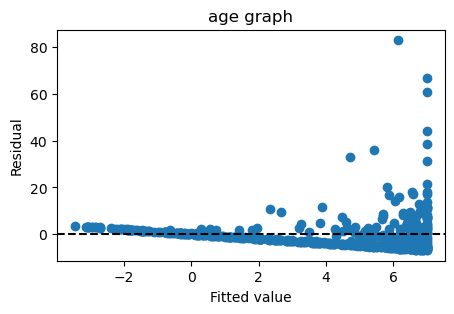

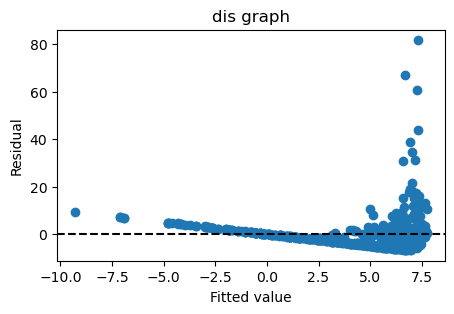

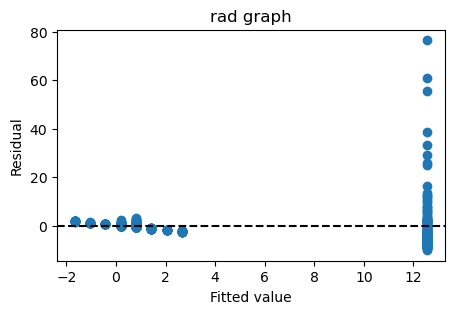

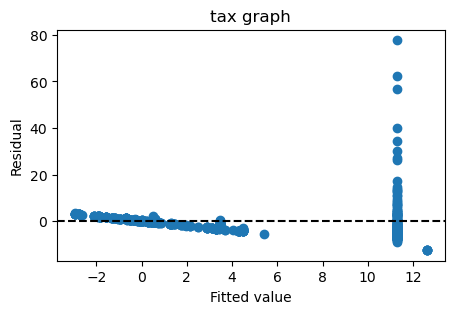

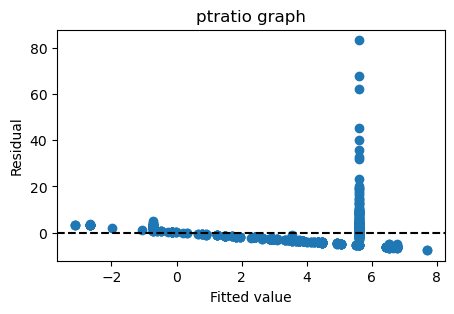

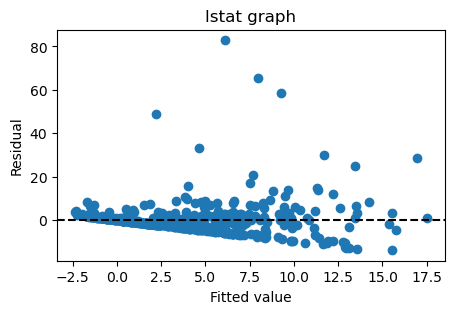

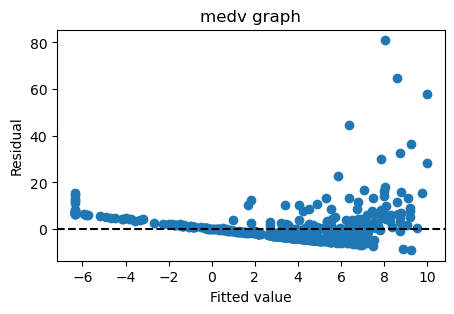

In [525]:
for i in model_a:
    plt.figure(figsize=(5,3))
    plt.scatter(i.fittedvalues, i.resid)
    plt.title(i.params.index[1]+' graph')
    plt.xlabel('Fitted value') 
    plt.ylabel('Residual')

    # have color black and dashed line
    plt.axhline(0, c='k', ls='--');
    plt.show()

    print('\n')

**But the graph shows only these predictors nox, rm, age, dis, lstat, mdev have higly relation with the response variable.**

## (b) Fit a multiple regression model to predict the response using all of the predictors. 

Describe your results. For which predictors can we reject the null hypothesis H0 : βj = 0?

In [526]:
cols = ['intercept'] + [col for col in boston.columns if col != 'intercept' and col !='crim']

In [527]:
X = boston[cols]
y = boston['crim']

In [528]:
model_b = sm.OLS(y, X).fit()
summarize(model_b)

,coef,std err,t,P>|t|
intercept,13.7784,7.082,1.946,0.052
zn,0.0457,0.019,2.433,0.015
indus,-0.0584,0.084,-0.698,0.486
chas,-0.8254,1.183,-0.697,0.486
nox,-9.9576,5.290,-1.882,0.060
rm,0.6289,0.607,1.036,0.301
age,-0.0008,0.018,-0.047,0.962
dis,-1.0122,0.282,-3.584,0.000
rad,0.6125,0.088,6.997,0.000
tax,-0.0038,0.005,-0.730,0.466


**We can reject the null hypothesis for below predictors**
1. zn
2. dis
3. rad
4. medv

## (c) How do your results from (a) compare to your results from (b)? 

Create a plot displaying the univariate regression coefficients from (a) on the x-axis, and the multiple regression coefficients from (b) on the y-axis. That is, each predictor is displayed as a single point in the plot. Its coefficient in a simple linear regression model is shown on the x-axis, and its coefficient estimate in the multiple linear regression model is shown on the y-axis.

In [529]:
model_a_coef = []

# get the model a coefficient and append them in a list one by one
for i in model_a:
    model_a_coef.append(i.params[1])


# get the coefficient of model b
model_b_coef = model_b.params

# drop the element intercept and its value
model_b_coef = model_b_coef.drop('intercept')

#converting pandas series into dataframe
model_df = model_b_coef.to_frame(name='model b')
model_df['model a'] = model_a_coef

model_df

,model b,model a
zn,0.045710,-0.073935
indus,-0.058350,0.509776
chas,-0.825378,-1.892777
nox,-9.957587,31.248531
rm,0.628911,-2.684051
age,-0.000848,0.107786
dis,-1.012247,-1.550902
rad,0.612465,0.617911
tax,-0.003776,0.029742
ptratio,-0.304073,1.151983


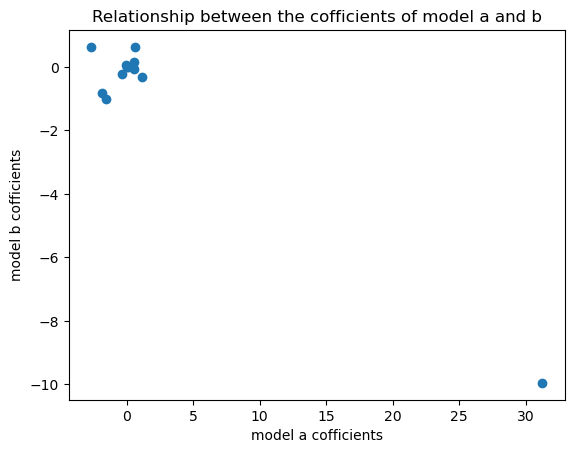

In [530]:
plt.scatter(model_df['model a'], model_df['model b'])
plt.xlabel('model a cofficients') 
plt.ylabel('model b cofficients')
plt.title('Relationship between the cofficients of model a and b')
plt.show()

## (d) Is there evidence of non-linear association between any of the predictors and the response? 

To answer this question, for each predictor X, fit a model of the form
Y = β0 + β1X1 + β2X2 ^ 2 + β3X3 ^ 3 + ε.

In [531]:
boston = boston.drop('intercept', axis=1)

X = boston.drop('crim', axis=1)

In [532]:
y = boston['crim']

In [533]:
X.shape[1]

12

In [534]:
intercept = np.ones(boston.shape[0])

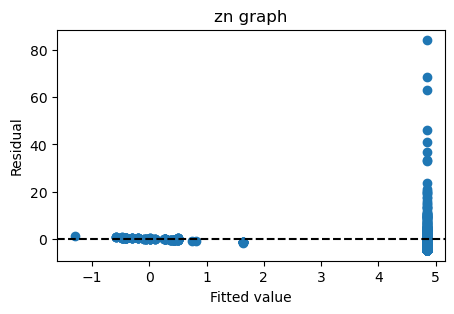

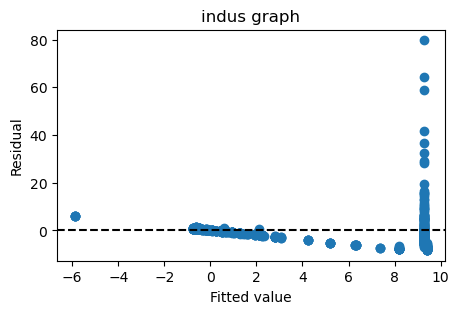

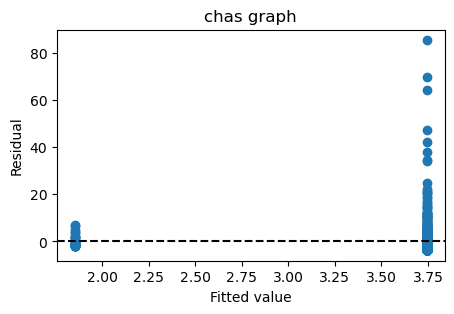

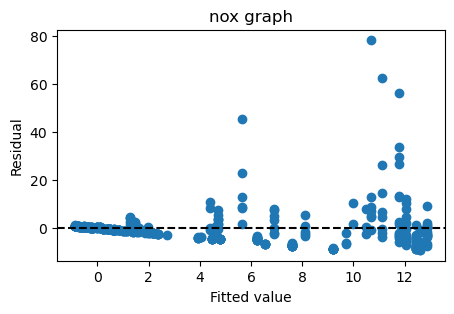

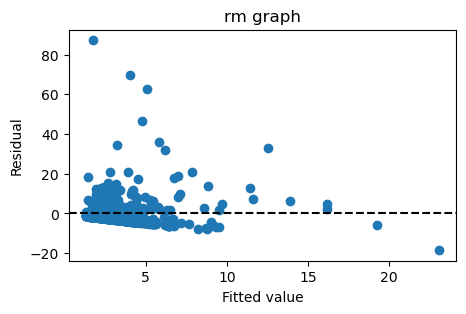

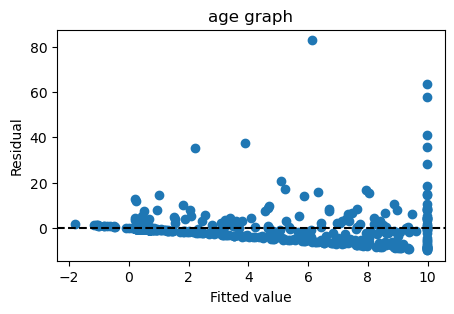

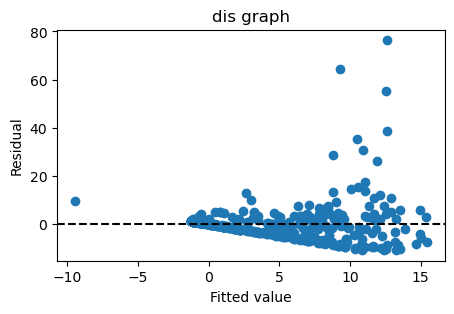

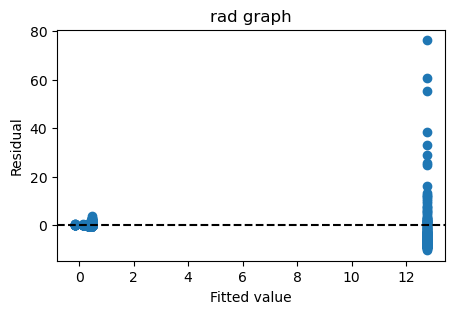

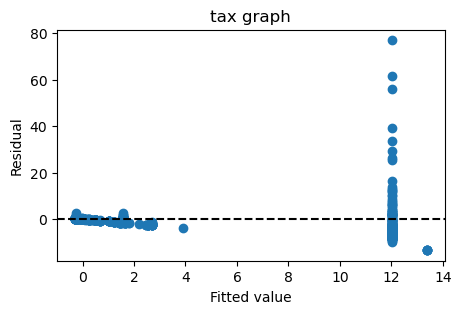

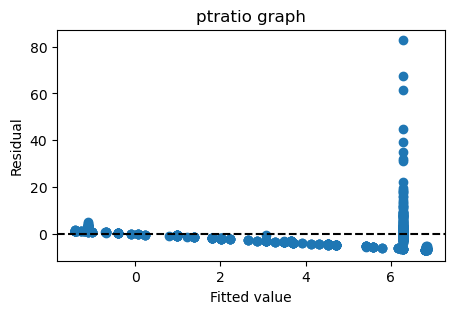

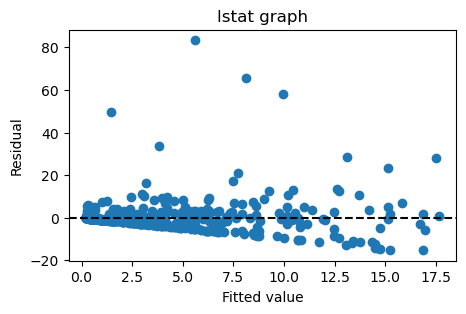

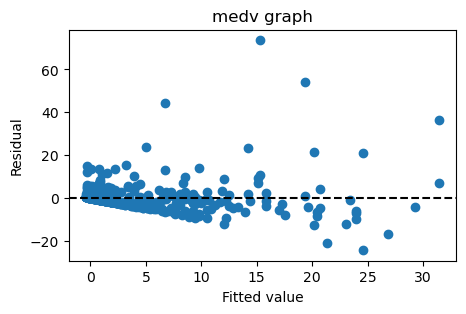

In [535]:
for col in X.columns:
    dummy_X = pd.DataFrame({'intercept':intercept, col+' deg 1' : X[col], col+' deg 2' : X[col]**2, col+' deg 3' : X[col]**3})
    results = sm.OLS(y, dummy_X).fit()
    
    plt.figure(figsize=(5,3))
    plt.scatter(results.fittedvalues, results.resid)
    plt.title(col+' graph')
    plt.xlabel('Fitted value') 
    plt.ylabel('Residual')
    
    # have color black and dashed line
    plt.axhline(0, c='k', ls='--');
    plt.show()
    print("\n\n\n")

**There is non linear association between these predictors nox, rm, age, dis, lstat, mdev, and the response variable**